In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input\fifa-world-cup-2022\international_matches.csv


In [214]:
df = pd.read_csv('input/fifa-world-cup-2022/international_matches.csv', parse_dates = ['date'])
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [215]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

### Analyze and fill na's

In [216]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [217]:
#We can fill mean for na's in goal_keeper_score
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

In [218]:
#We can fill mean for na's in defense score
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

In [219]:
#We can fill mean for na's in offense score
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

In [220]:
#We can fill mean for na's in midfield score
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

In [221]:
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
dtype: int64

In [222]:
#Teams are not available in FIFA game itself, so they are not less than average performing teams, so giving a average score of 50 for all.
df.fillna(50,inplace=True)

In [223]:
df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [224]:
#Filter the teams participating in World cup 22
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]


In [225]:
#Using 2018s data only
final_df=final_df[final_df['date']>=pd.to_datetime('2018-1-1')]


## Task = Top 10 teams in Worldcup 22 with individual winning percentage

In [226]:
rank = final_df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
rank = pd.concat([home,away])
#Select each country latest match
rank = rank.sort_values(['team','date'],ascending=[True,False])
rank = rank.groupby('team').first().sort_values('rank',ascending=True).reset_index()
rank = rank[(rank["team"].apply(lambda x: x in list_2022))][0:]
# rank_top10
rank

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10
10,Denmark,2022-06-13,11


In [227]:
def home_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    return round(score)

In [228]:
rank['Home_win_Per'] = np.vectorize(home_percentage)(rank['team'])
rank['Away_win_Per'] = np.vectorize(away_percentage)(rank['team'])
rank['Average_win_Per'] = round((rank['Home_win_Per'] + rank['Away_win_Per'])/2)
rank_top10_Win = rank.sort_values('Average_win_Per',ascending=False)
rank_top10_Win

,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Per
0,Brazil,2022-06-06,1,78,60,69.0
6,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
11,Germany,2022-06-14,12,63,59,61.0
20,IR Iran,2022-06-12,21,70,48,59.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
7,Portugal,2022-06-12,8,67,49,58.0
9,Netherlands,2022-06-14,10,62,55,58.0
15,Croatia,2022-06-13,16,60,48,54.0


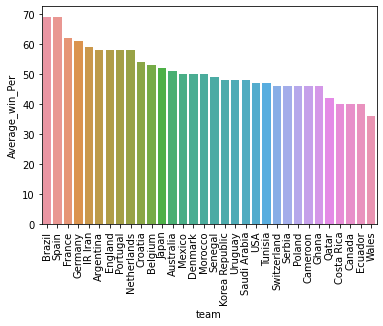

In [229]:
sns.barplot(data=rank_top10_Win,x='team',y='Average_win_Per')
plt.xticks(rotation=90);

In [230]:
#Mapping numeric values for home_team_result to find the correleations
final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})


In [231]:
final_df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_mean_defense_score     0.227827
home_team_mean_midfield_score    0.221333
home_team_mean_offense_score     0.217210
home_team_goalkeeper_score       0.206001
home_team_total_fifa_points      0.180753
home_team_score                  0.173222
away_team_fifa_rank              0.118206
away_team_total_fifa_points     -0.077164
neutral_location                -0.084648
away_team_mean_defense_score    -0.105654
away_team_mean_midfield_score   -0.106551
away_team_goalkeeper_score      -0.119240
away_team_mean_offense_score    -0.122782
home_team_fifa_rank             -0.260333
away_team_score                 -0.456330
Name: home_team_result, dtype: float64

In [232]:
#Dropping unnecessary colums
final_df = final_df.drop(['date', 'home_team_continent','away_team_continent','home_team_total_fifa_points', 'away_team_total_fifa_points','home_team_score', 'tournament', 'city', 'country','neutral_location', 'shoot_out'],axis=1)

In [233]:
final_df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'away_team_score', 'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [234]:
#change column names
final_df.rename(columns={"home_team":"Team1", "away_team": "Team2", "home_team_fifa_rank": "Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"},inplace=True)

<AxesSubplot:>

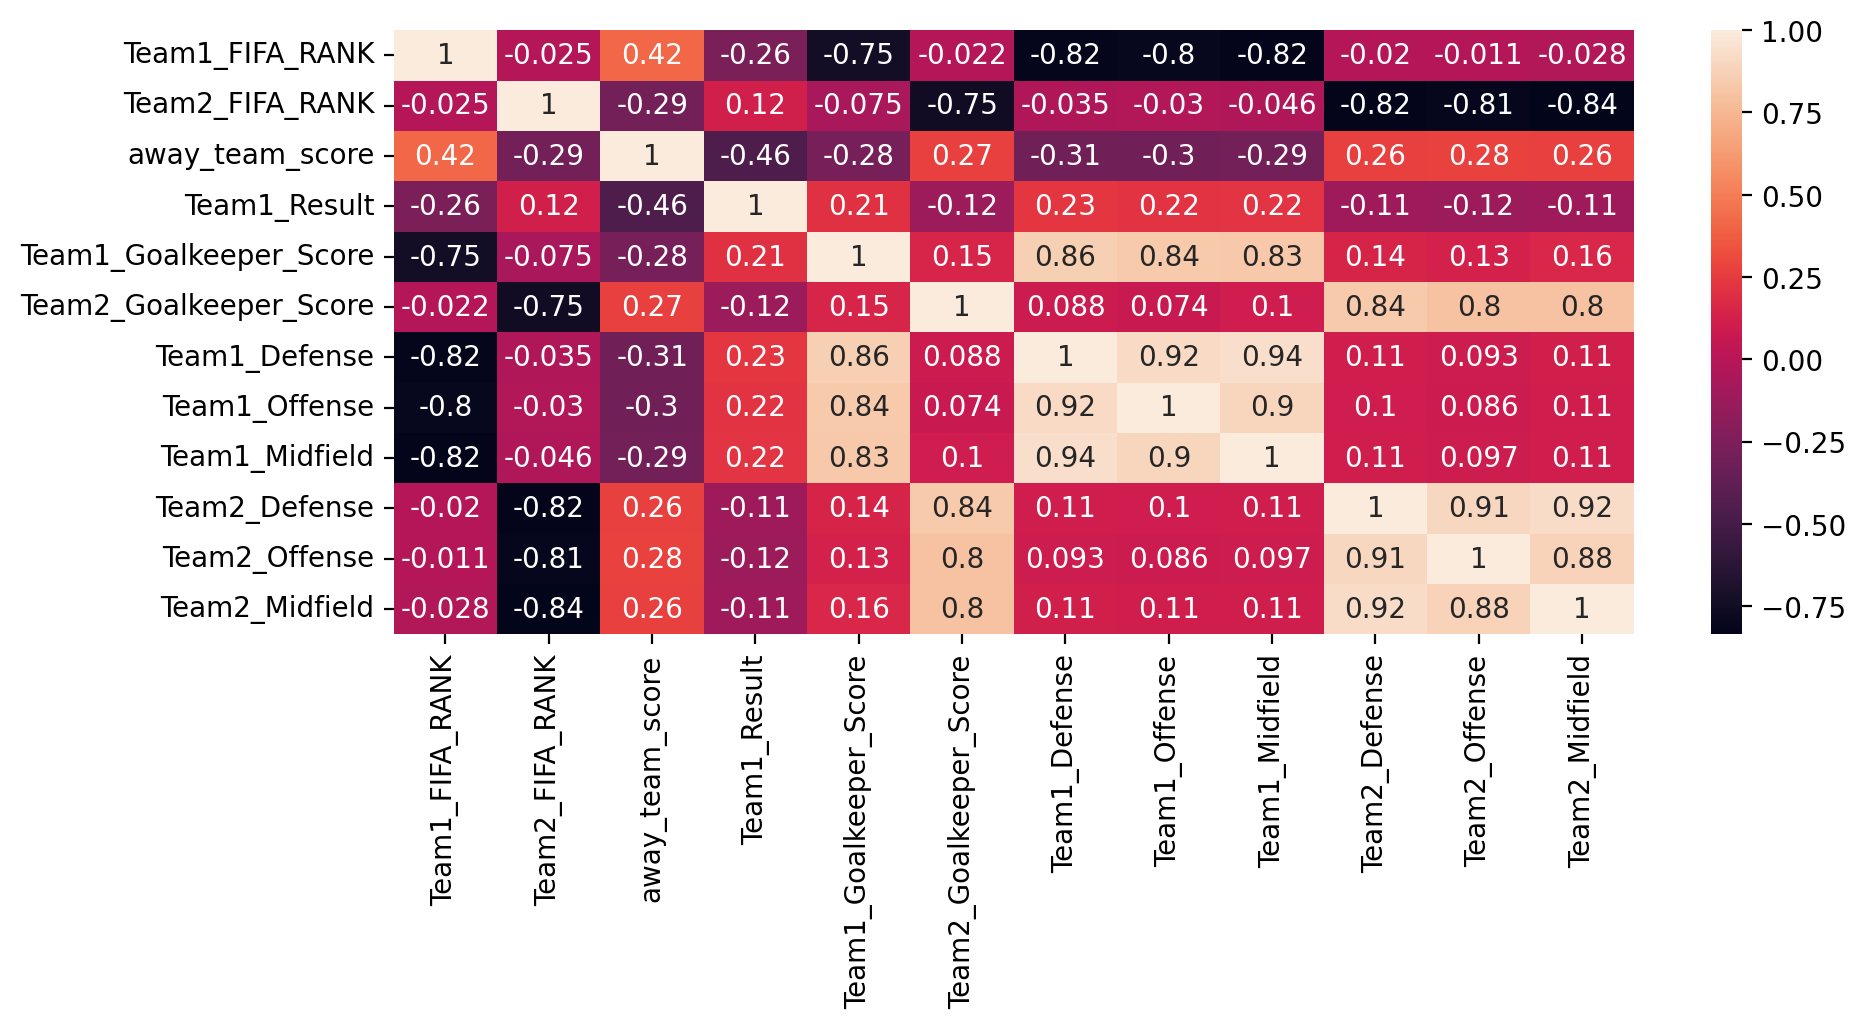

In [235]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(final_df.corr(),annot=True)

In [236]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 20074 to 23920
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team1                   1414 non-null   object 
 1   Team2                   1414 non-null   object 
 2   Team1_FIFA_RANK         1414 non-null   int64  
 3   Team2_FIFA_RANK         1414 non-null   int64  
 4   away_team_score         1414 non-null   int64  
 5   Team1_Result            1414 non-null   int64  
 6   Team1_Goalkeeper_Score  1414 non-null   float64
 7   Team2_Goalkeeper_Score  1414 non-null   float64
 8   Team1_Defense           1414 non-null   float64
 9   Team1_Offense           1414 non-null   float64
 10  Team1_Midfield          1414 non-null   float64
 11  Team2_Defense           1414 non-null   float64
 12  Team2_Offense           1414 non-null   float64
 13  Team2_Midfield          1414 non-null   float64
dtypes: float64(8), int64(4), object(2)


In [237]:
data_for_match_predict=final_df
def label_race(row):
   if row['Team1_Result'] == 1 :
      return 0
   if row['Team1_Result'] == 0 :
      return 1
   return 2
data_for_match_predict['Team2_Result'] = data_for_match_predict.apply(lambda row: label_race(row), axis=1)


In [238]:
print(final_df)

                Team1       Team2  Team1_FIFA_RANK  Team2_FIFA_RANK  \
20074         Denmark      Sweden               12               18   
20077         Morocco  Mauritania               40               99   
20085        Cameroon       Congo               45               96   
20086         Morocco      Guinea               40               65   
20092          Angola    Cameroon              142               45   
...               ...         ...              ...              ...   
23908     Netherlands       Wales               10               18   
23909          Poland     Belgium               26                2   
23918           Chile       Ghana               28               60   
23919           Japan     Tunisia               23               35   
23920  Korea Republic       Egypt               29               32   

       away_team_score  Team1_Result  Team1_Goalkeeper_Score  \
20074                1             0                    83.0   
20077              

In [239]:
#Holdout another DF for pipeline
pipe_DF = final_df
#Create dummies for categorical columns
final_df = pd.get_dummies(final_df)

In [240]:
#split X and y and train test split (For League Matches)
X = final_df.drop('Team1_Result',axis=1) #
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
#Validtion and test set
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [241]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [242]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);
    print("Accuracy score",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00        35

    accuracy                           1.00       213
   macro avg       1.00      1.00      1.00       213
weighted avg       1.00      1.00      1.00       213

Accuracy score 1.0


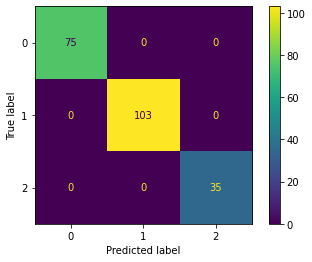

In [243]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
metrics_display(DecisionTreeClassifier())


c:\Users\Mikaaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Mikaaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Mikaaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikaaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

Ty le thua  Argentina khi gap Brazil 0.2
Ty le thang  Argentina khi gap Brazil 0.0
Ty le hoa  Argentina khi gap Brazil 0.8
Ket qua du doan: 
 None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.25      1.00      0.40         1

    accuracy                           0.20         5
   macro avg       0.08      0.33      0.13         5
weighted avg       0.05      0.20      0.08         5

Accuracy score 0.2


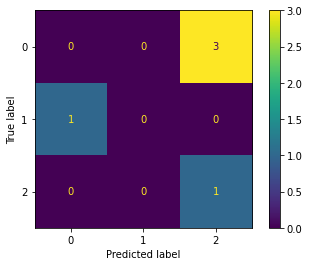

In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from collections import Counter


def predict(data, model, team1, team2):
    model.fit(X_train, y_train)
    pred1 = model.predict(data[0])
    pred2 = model.predict(data[2])
    y_true=(np.concatenate((data[1], data[3]), axis=None))

    pred=np.concatenate((pred1, pred2), axis=None)
    print("Ket qua du doan: \n", print_preditct(pred, team1, team2))
    print(classification_report(y_true, pred))
    ConfusionMatrixDisplay.from_predictions(y_true, pred)
    print("Accuracy score", accuracy_score(y_true, pred))


def print_preditct(pred, team1, team2):
    result = Counter(pred)
    print("Ty le thua ", team1, "khi gap", team2, result[0] / pred.size)
    print("Ty le thang ", team1, "khi gap", team2, result[1] / pred.size)
    print("Ty le hoa ", team1, "khi gap", team2, result[2] / pred.size)


def get_match_data(team1, team2):
    match1 = data_for_match_predict[
        (data_for_match_predict["Team1"] == team1)
        & (data_for_match_predict["Team2"] == team2)
    ]
    match2 = data_for_match_predict[
        (
            (data_for_match_predict["Team1"] == team2)
            & (data_for_match_predict["Team2"] == team1)
        )
    ]
    final_match1 = pd.get_dummies(match1)
    final_match_y1 = final_match1["Team1_Result"]
    final_match_x1 = final_match1.drop("Team1_Result", axis=1)
    final_match_x1 = final_match_x1.reindex(X.columns, axis=1, fill_value=0)
    final_match2 = pd.get_dummies(match2)
    final_match_y2 = final_match2["Team1_Result"]
    final_match_x2 = final_match2.drop("Team1_Result", axis=1)
    final_match_x2 = final_match_x2.reindex(X.columns, axis=1, fill_value=0)
    return final_match_x1, final_match_y1, final_match_x2, final_match_y2


# def get_home_data(team):
#     Team = data_for_match_predict[data_for_match_predict["Team1"] == team]
#     final_match = pd.get_dummies(Team)
#     final_match_y = final_match["Team1_Result"]
#     final_match_x = final_match.drop("Team1_Result", axis=1)
#     final_match_x = final_match_x.reindex(X.columns, axis=1, fill_value=0)
#     return final_match_x, final_match_y

# def get_away_data(team):
#     Team = data_for_match_predict[data_for_match_predict["Team2"] == team]
#     final_match = pd.get_dummies(Team)
#     final_match_y = final_match["Team2_Result"]
#     final_match_x = final_match.drop("Team2_Result", axis=1)
#     final_match_x = final_match_x.reindex(X.columns, axis=1, fill_value=0)
#     return final_match_x, final_match_y


predict(
    get_match_data("Argentina", "Brazil"),
    DecisionTreeClassifier(),
    "Argentina",
    "Brazil",
)

# Predictions for Knockout Stage - Removing Draw status

In [245]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [246]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result'] 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       107

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169

Accuracy score 1.0


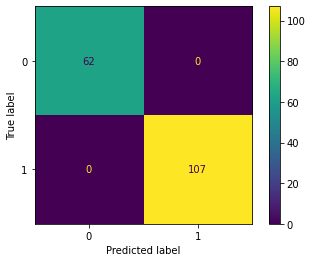

In [247]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
metrics_display(DecisionTreeClassifier())